In [1]:
# Import Libraries:
import coinmetrics # Coinmetrics API
from datetime import datetime, timedelta # Datetime Feature
import pandas as pd # Import Pandas
import panel as pn # Import Panel
import plotly.express as px # Import Plotly
pn.extension("plotly")# Import Plotly Extension
from pprint import pprint
import requests
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go


# Initialize a reference object (in this case `cm` for the Coinmetrics Community API)
cm = coinmetrics.Community()

In [23]:
# API INPUTS
asset = "btc"
begin_timestamp = (datetime.now() - timedelta(days=90)).date()
end_timestamp = (datetime.now() - timedelta(days=0)).date()
# end_timestamp = datetime.now().date()


# API OUTPUT
# asset_data = requests.get(f"https://community-api.coinmetrics.io/v4/timeseries/market-candles?start_time={begin_timestamp}&paging_from=start&markets=coinbase-{asset}-usd-spot&pretty=true").json()
asset_data = requests.get(f"https://community-api.coinmetrics.io/v4/timeseries/market-candles?start_time={begin_timestamp}&end_time={end_timestamp}&paging_from=start&markets=coinbase-{asset}-usd-spot&pretty=true").json()


In [24]:
# Initiate clean dictionary
data_dictionary = {
    "date" : [],
    "open" : [],
    "close" : [],
    "high" : [],
    "low" : [],
    "volume" : [],
    "vwap" : [], 
}

# Use For Loop to interate through data into dictionary
for entry in asset_data['data']:
    data_dictionary['date'].append(entry['time'])
    data_dictionary['open'].append(float(entry['price_open']))
    data_dictionary['close'].append(float(entry['price_close']))
    data_dictionary['high'].append(float(entry['price_high']))
    data_dictionary['low'].append(float(entry['price_low']))
    data_dictionary['volume'].append(float(entry['volume']))
    data_dictionary['vwap'].append(float(entry['vwap']))


    
#     {'data': [{'candle_trades_count': '301135',
#            'candle_usd_volume': '547725314.072704441370172316698874',
#            'market': 'coinbase-btc-usd-spot',
#            'price_close': '47833.64',
#            'price_high': '47953.9',
#            'price_low': '44249.64',
#            'price_open': '44422.15',
#            'time': '2021-08-13T00:00:00.000000000Z',
#            'volume': '11794.94196257',
#            'vwap': '46437.30472018029'},

asset_data_df = pd.DataFrame.from_dict(data_dictionary)
pd.options.display.float_format = "{:,.2f}".format
# INSERT HERE >>> FIND WAY TO CLEAN DATE DATA
asset_data_df.tail()

,date,open,close,high,low,volume,vwap
85,2021-11-11T00:00:00.000000000Z,"64,912.20","64,807.74","65,600.00","64,133.78","10,259.51","64,897.58"
86,2021-11-12T00:00:00.000000000Z,"64,807.73","64,147.90","65,477.06","62,300.00","13,658.63","63,864.65"
87,2021-11-13T00:00:00.000000000Z,"64,144.42","64,400.01","64,990.00","63,394.17","5,968.10","64,159.70"
88,2021-11-14T00:00:00.000000000Z,"64,400.01","65,505.02","65,525.00","63,596.90","6,081.57","64,515.20"
89,2021-11-15T00:00:00.000000000Z,"65,505.03","63,624.59","66,339.90","63,371.00","10,426.56","64,753.40"


In [25]:
# renaming data frame to work with RSI
rdf= asset_data_df
# setting the date as the index
rdf = rdf.set_index(pd.DatetimeIndex(rdf['date']))

In [26]:
rdf

,date,open,close,high,low,volume,vwap
date,,,,,,,
2021-08-18 00:00:00+00:00,2021-08-18T00:00:00.000000000Z,"44,675.34","44,707.98","46,035.27","44,216.47","10,327.50","45,113.73"
2021-08-19 00:00:00+00:00,2021-08-19T00:00:00.000000000Z,"44,709.10","46,770.14","47,088.08","43,955.00","11,938.12","45,486.35"
2021-08-20 00:00:00+00:00,2021-08-20T00:00:00.000000000Z,"46,769.02","49,342.40","49,400.00","46,644.95","13,184.67","48,000.67"
2021-08-21 00:00:00+00:00,2021-08-21T00:00:00.000000000Z,"49,349.99","48,867.02","49,821.92","48,285.28","9,574.84","49,058.09"
2021-08-22 00:00:00+00:00,2021-08-22T00:00:00.000000000Z,"48,870.21","49,284.63","49,526.13","48,102.89","6,243.40","48,847.07"
...,...,...,...,...,...,...,...
2021-11-11 00:00:00+00:00,2021-11-11T00:00:00.000000000Z,"64,912.20","64,807.74","65,600.00","64,133.78","10,259.51","64,897.58"
2021-11-12 00:00:00+00:00,2021-11-12T00:00:00.000000000Z,"64,807.73","64,147.90","65,477.06","62,300.00","13,658.63","63,864.65"
2021-11-13 00:00:00+00:00,2021-11-13T00:00:00.000000000Z,"64,144.42","64,400.01","64,990.00","63,394.17","5,968.10","64,159.70"


In [27]:
#creating a function to calculate RSI

def calc_rsi(close, lookback):
    change = close.diff()
    up = []
    down = []
    
    
    
    for i in range(len(change)):
        if change[i] < 0:
            up.append(0)
            down.append(change[i])
        else:
            up.append(change[i])
            down.append(0)
            
            
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs))
    rsi_df = pd.DataFrame(rsi).rename(columns = {0:'rsi'}).set_index(close.index)
    rsi_df = rsi_df.dropna()
    
    return rsi_df[3:]

#returning the function to the data frame with a window of 14 days
rdf['rsi_14'] = calc_rsi(rdf['close'], 14)
rdf = rdf.dropna()
rdf

,date,open,close,high,low,volume,vwap,rsi_14
date,,,,,,,,
2021-08-22 00:00:00+00:00,2021-08-22T00:00:00.000000000Z,"48,870.21","49,284.63","49,526.13","48,102.89","6,243.40","48,847.07",98.31
2021-08-23 00:00:00+00:00,2021-08-23T00:00:00.000000000Z,"49,284.38","49,506.50","50,505.00","49,012.84","10,824.27","49,881.69",98.33
2021-08-24 00:00:00+00:00,2021-08-24T00:00:00.000000000Z,"49,504.53","47,682.45","49,875.90","47,600.00","12,068.34","48,642.69",91.04
2021-08-25 00:00:00+00:00,2021-08-25T00:00:00.000000000Z,"47,682.45","48,987.33","49,277.00","47,122.02","9,289.23","48,212.27",91.53
2021-08-26 00:00:00+00:00,2021-08-26T00:00:00.000000000Z,"48,991.57","46,851.47","49,365.10","46,315.48","11,651.32","47,253.25",83.57
...,...,...,...,...,...,...,...,...
2021-11-11 00:00:00+00:00,2021-11-11T00:00:00.000000000Z,"64,912.20","64,807.74","65,600.00","64,133.78","10,259.51","64,897.58",59.15
2021-11-12 00:00:00+00:00,2021-11-12T00:00:00.000000000Z,"64,807.73","64,147.90","65,477.06","62,300.00","13,658.63","63,864.65",57.09
2021-11-13 00:00:00+00:00,2021-11-13T00:00:00.000000000Z,"64,144.42","64,400.01","64,990.00","63,394.17","5,968.10","64,159.70",57.70


In [28]:
#Creating a function to find the sell/buy price determined by the RSI
def rsi_signals(prices, rsi):    
    buy_price = []
    sell_price = []
    signal = 0
    rsi_signal = []

    for i in range(len(rsi)):
        if rdf['rsi_14'][i] < 30: #When the calculated rsi is less than 30 creates a buy signal 
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                rsi_signal.append(signal) #A value of 1 would refelct the signal to buy 
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                signal = 0
                rsi_signal.append(0) #A value of 0 reflects a neautral postion 

        elif rdf['rsi_14'][i] > 70: #When the calculted rsi is greater than 70 creates a sell signal
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1 
                rsi_signal.append(signal) #A value of -1 would refelct a signal to sell 
                
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                signal = 0
                rsi_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            rsi_signal.append(0) 
            
         
    return buy_price, sell_price, rsi_signal
            

rdf['buy_price'], rdf['sell_price'],rdf['rsi_signal'] = rsi_signals(rdf['close'], rdf['rsi_14'])




C:\Users\ajedw\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
rdf.head()

,date,open,close,high,low,volume,vwap,rsi_14,buy_price,sell_price,rsi_signal
date,,,,,,,,,,,
2021-08-22 00:00:00+00:00,2021-08-22T00:00:00.000000000Z,"48,870.21","49,284.63","49,526.13","48,102.89","6,243.40","48,847.07",98.31,NaN,"49,284.63",-1
2021-08-23 00:00:00+00:00,2021-08-23T00:00:00.000000000Z,"49,284.38","49,506.50","50,505.00","49,012.84","10,824.27","49,881.69",98.33,NaN,NaN,0
2021-08-24 00:00:00+00:00,2021-08-24T00:00:00.000000000Z,"49,504.53","47,682.45","49,875.90","47,600.00","12,068.34","48,642.69",91.04,NaN,"47,682.45",-1
2021-08-25 00:00:00+00:00,2021-08-25T00:00:00.000000000Z,"47,682.45","48,987.33","49,277.00","47,122.02","9,289.23","48,212.27",91.53,NaN,NaN,0
2021-08-26 00:00:00+00:00,2021-08-26T00:00:00.000000000Z,"48,991.57","46,851.47","49,365.10","46,315.48","11,651.32","47,253.25",83.57,NaN,"46,851.47",-1


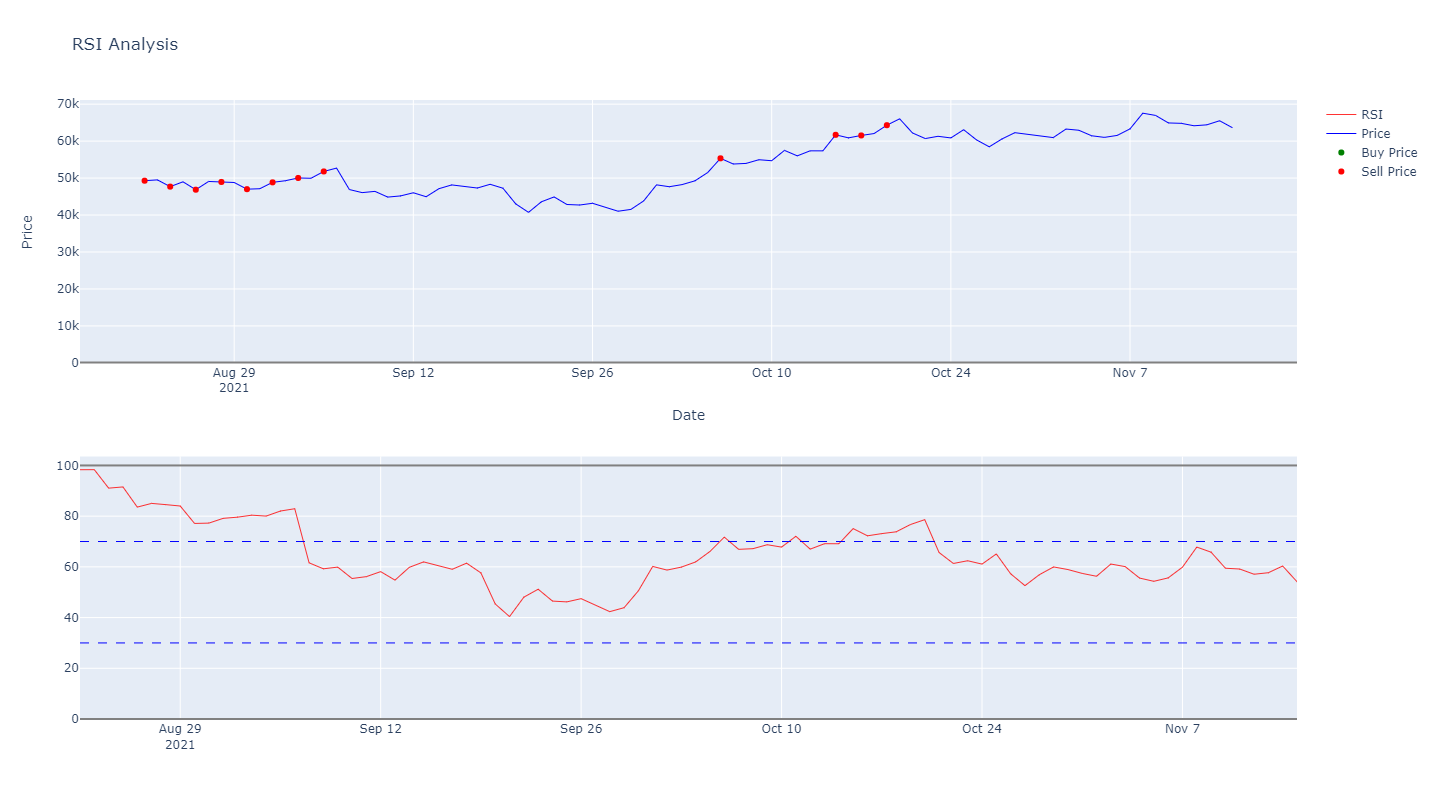

In [30]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=1) # Creating two tables on top of eachother with shared x axis 

fig.add_trace(go.Scatter(x=rdf.index, y= rdf['rsi_14'], line=dict (color='red', width=.8), name = 'RSI', ), col=1, row=2)

fig.add_trace(go.Scatter(x=rdf.index, y= rdf['close'], line=dict (color='blue', width=1), name = 'Price'), col=1, row=1)
#Markers will show what price to buy and sell the crypto
fig.add_trace(go.Scatter(x=rdf.index, y=rdf['buy_price'],mode='markers',marker=dict(color='Green'),name='Buy Price'), col=1, row=1) 

fig.add_trace(go.Scatter(x=rdf.index, y=rdf['sell_price'], mode='markers',marker=dict(color='Red'), name='Sell Price'), col=1, row=1)


#fig.add_trace(go.Candlestick(x=rdf.index, open= rdf['open'],high=rdf['high'], low= rdf['low'], close=rdf['close'], name = 'Price'), col=1, row=1)


fig.update_layout(title='RSI Analysis',xaxis_title='Date',yaxis_title='Price', height=800)



fig.add_hline(y=0,col=1, row=2, line_color="grey", line_width=2)
fig.add_hline(y=100, line_color="grey", line_width=2)

# Upper and lower bands
fig.add_hline(y=30,col=1, row=2, line_color='blue', line_width=1, line_dash='dash')
fig.add_hline(y=70,col=1, row=2, line_color='blue', line_width=1, line_dash='dash')





fig.show()

In [31]:
#def rs(data):
     #for i in range(len(data)):   
       # if rdf['rsi_14'][i] < 30:
                #signal.append(1)
       
        #if df['rsi_14'][i] > 70:
                #signal.append(-1)
       
        #return signal
            